# ZOMATO RESTAURANT RATINGS

### **ABSTRACT**

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is. 

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

Content
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing
day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with
established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as

    • Location of the restaurant
    • Approx Price of food
    • Theme based restaurant or not
    • Which locality of that city serves that cuisines with maximum number of restaurants
    • The needs of people who are striving to get the best cuisine of the neighborhood
    • Is a particular neighborhood famous for its own kind of food.

**“Just so that you have a good meal the next time you step out”**

The data is accurate to that available on the zomato website until 15 March 2019.
The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

**Phase I,**

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

**Phase II,**

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their onlineorder, booktable, rate, votes, phone, location, resttype, dishliked, cuisines, approxcost(for two people), reviewslist, menu_item was extracted. See section 5 for more details about the variables.

**Acknowledgements**

The data scraped was entirely for educational purposes only. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd..

### MAIN OBJECTIVE:

> 1. Perform extensive Exploratoty Data Analysis(EDA) in the Zomato Dataset

> 2. Build appropriate **Machine Learning Model** that will help various Zomato Restaurants to predict their respective Ratings based in certain features

> 3. DEPLOY, the Machine Learning model via Flask that can be used to make lice predictions of restaurants ratings


## 1. EXPLORATORY DATA ANALYSIS

In [1]:
# import the libraries
from pyforest import*
import plotly.graph_objs as go
import plotly.offline as py

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# Function for the clead dataframe

def all():
    # load the csv
    df = pd.read_csv('zomato.csv')
    
    # Deleting unnecessary columns
    df = df.drop(['url','phone'],axis=1)
    
    # Dropping duplicate values
    df.drop_duplicates(inplace=True)
    
    # Remove the Nan values from the dataset
    df.dropna(how='any',inplace =True)
    
    # Renaming the columns appropriately
    df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
    
    # Cleaning the dataset
    
    # Reading unique values from the cost column
    df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) # Using lambda function to replace ',' from cost
    df['cost'] = df['cost'].astype(float)

    df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
     # Getting rid of "NEW"
    df = df.loc[df.rate != 'NEW']
    df['rate'] = df['rate'].astype(float)
    
    return df

### Load the dataset

In [2]:
df = pd.read_csv('zomato.csv')
df.head(5)

<IPython.core.display.Javascript object>

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [13]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Columns description

1. <b>url </B> contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost**(for two people) contains the approximate cost of meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in**(type) type of meal

17. **listed_in**(**city**) contains the neighborhood in which the restaurant is listed

In [15]:
df.shape

(51717, 17)

In [ ]:
# You can use pandas profiling to get an over all overview of the dataset 
# import pandas_profiling as pf

# pf.ProfileReport(df)

In [59]:
# Deleting unnecessary columns
df = df.drop(['url','phone'],axis=1)

#### Checking for duplicate values

In [60]:
df.duplicated().sum()

43

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.duplicated().sum()

0

#### Dropping null values

In [63]:
# Remive the Nan values from the dataset
df.dropna(how='any',inplace =True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [31]:
df.shape

(23395, 15)

#### Renaming columns appropriately

In [64]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [65]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

#### CLeaning the Dataset

In [66]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [67]:
# Reading unique values from the cost column
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) # Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float)

In [68]:
df['cost'].dtypes

dtype('float64')

In [69]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [70]:
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', 'NEW', '2.4', '2.2',
       '2.3', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ',
       '2.5 ', '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ',
       '3.0 ', '2.8 ', '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ',
       '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [71]:
# Getting rid of "NEW"
df = df.loc[df.rate != 'NEW']

In [72]:
# Checking for NEW
df['rate'][df['rate']=='NEW'].value_counts()

Series([], Name: rate, dtype: int64)

In [73]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [75]:
df['rate'] = df['rate'].astype(float)

In [76]:
df.dtypes

address          object
name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [10]:
df = all()

<IPython.core.display.Javascript object>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23248 non-null  object 
 1   name          23248 non-null  object 
 2   online_order  23248 non-null  object 
 3   book_table    23248 non-null  object 
 4   rate          23248 non-null  float64
 5   votes         23248 non-null  int64  
 6   location      23248 non-null  object 
 7   rest_type     23248 non-null  object 
 8   dish_liked    23248 non-null  object 
 9   cuisines      23248 non-null  object 
 10  cost          23248 non-null  float64
 11  reviews_list  23248 non-null  object 
 12  menu_item     23248 non-null  object 
 13  type          23248 non-null  object 
 14  city          23248 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 2.8+ MB


In [7]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### VISUALIZATION

**Most famous restaurants chains in Bangaluru**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

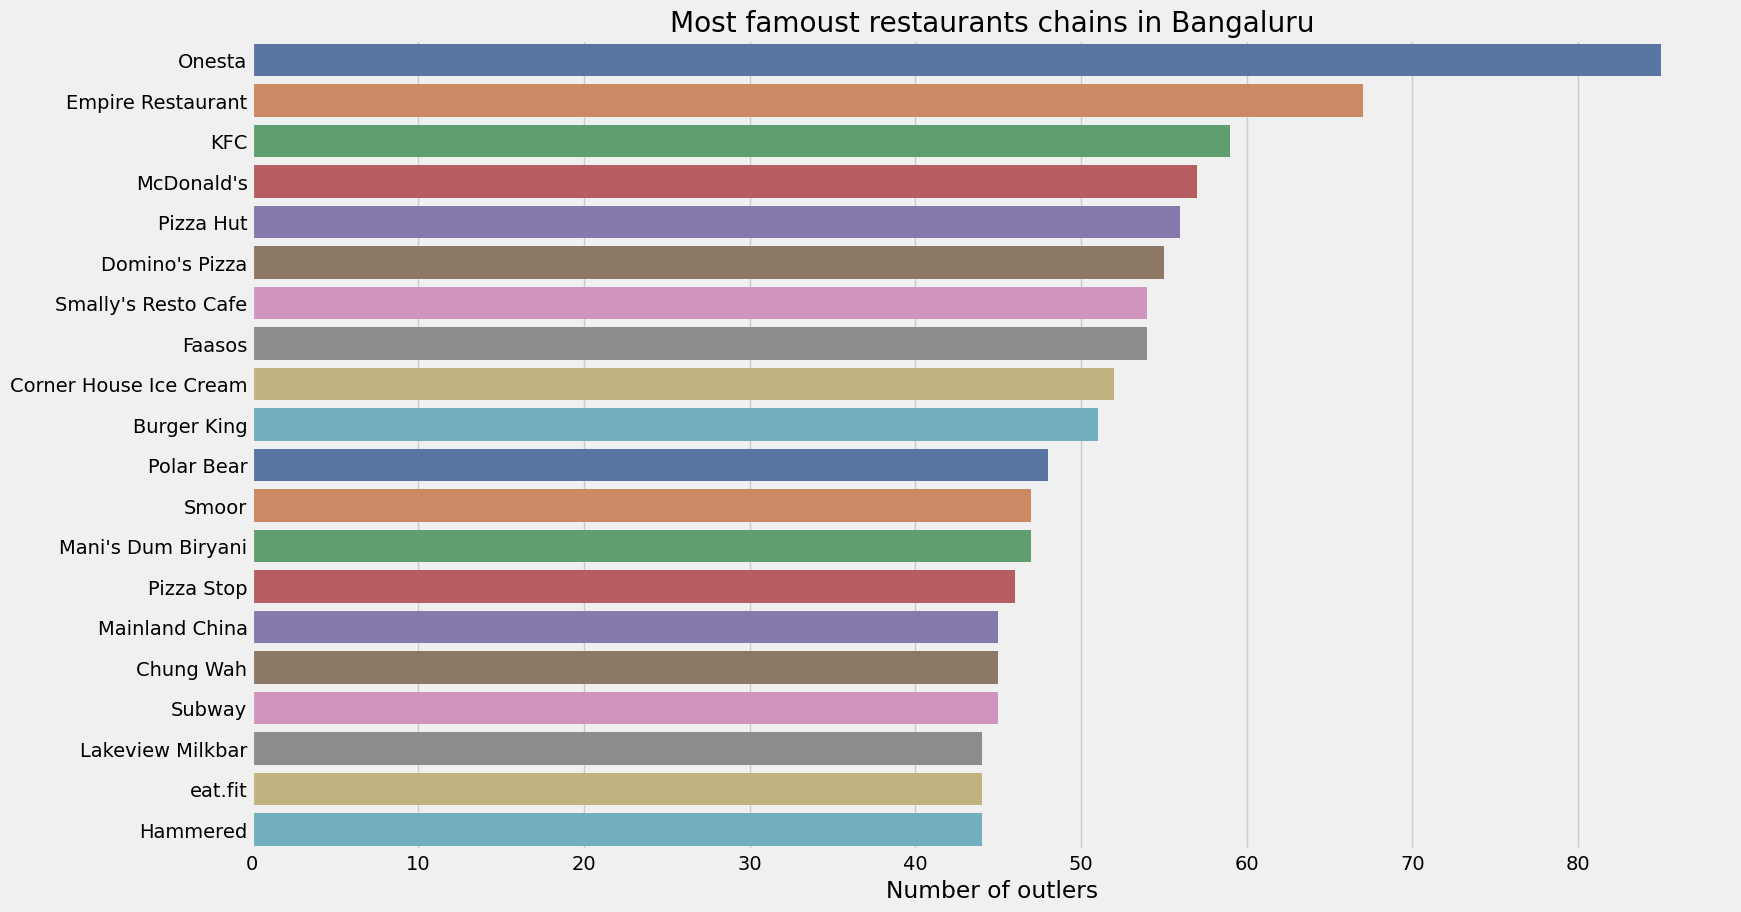

In [12]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title('Most famoust restaurants chains in Bangaluru')
plt.xlabel('Number of outlers')
plt.show()

**Whether restaurant offer Table booking or not**

In [14]:
x = df['book_table'].value_counts()
colors = ['#800080','#0000A0']
       
trace = go.Pie(labels=x.index,values=x,textinfo='value',
              marker=dict(colors=colors,
                         line=dict(color='#001000',width=2)))
layout = go.Layout(title='Table booking', width=600,height=600)
fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

**Whether Restaurants deliver online or not**

In [19]:
df['online_order'].value_counts()

Yes    16378
No      6870
Name: online_order, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

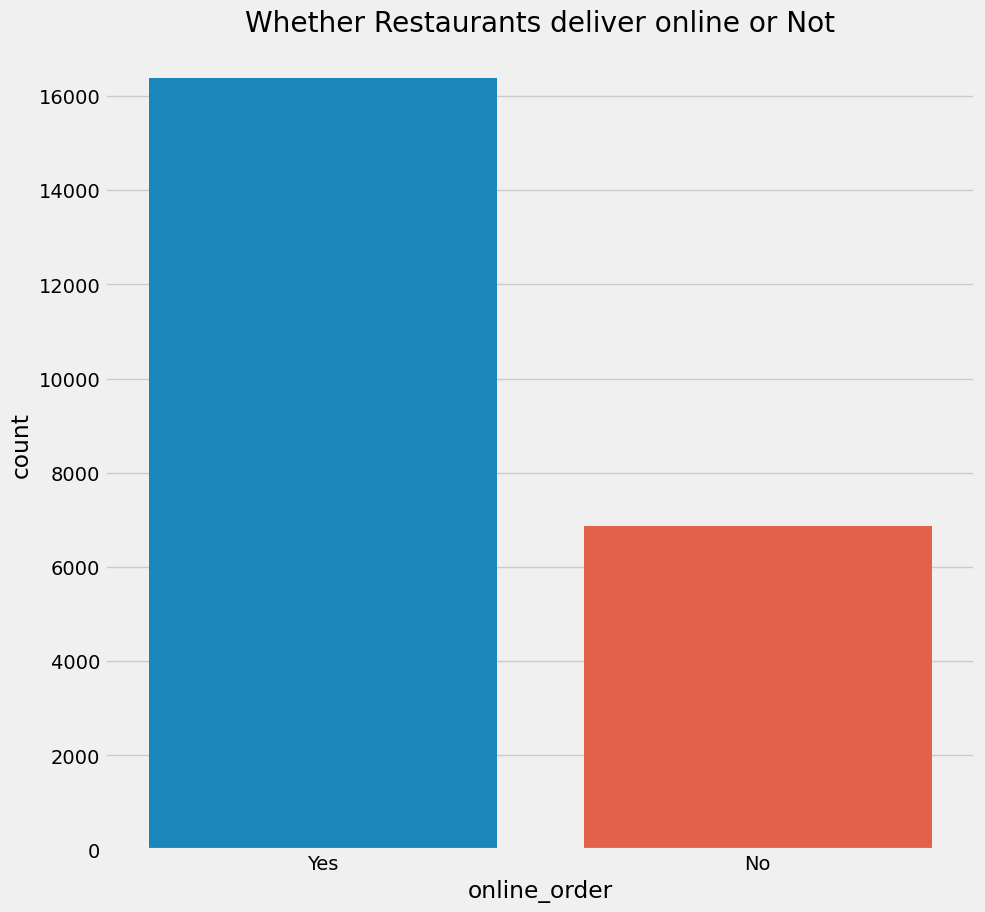

In [26]:
# Restaurants delivering Online or Not
sns.countplot(data=df, x = df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

### Insights:
>**Most Restaurants offer option for online**

## Ratings Distributions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='Density'>

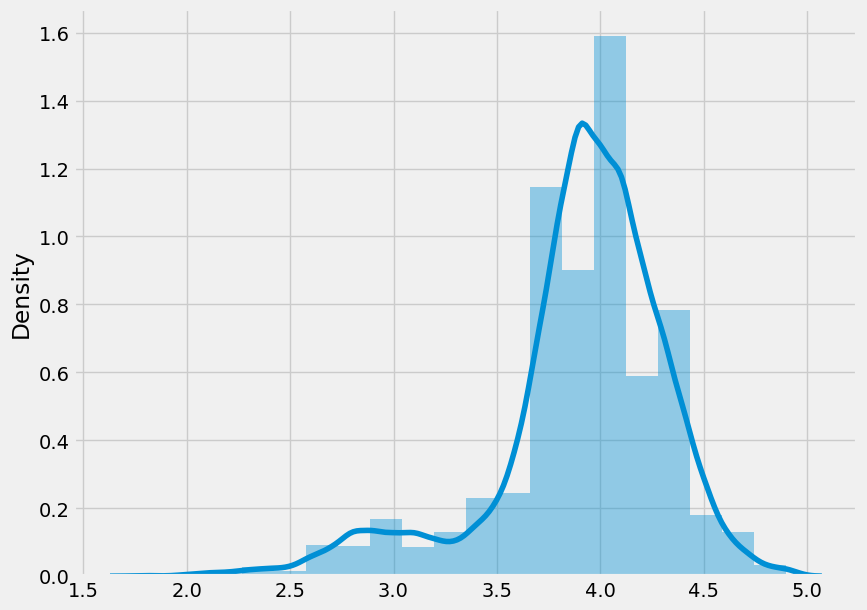

In [32]:
# How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(x = df['rate'], bins=20)

### Insights:
>**We can infer from that most of the ratings are within 3.5 and 4.5**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

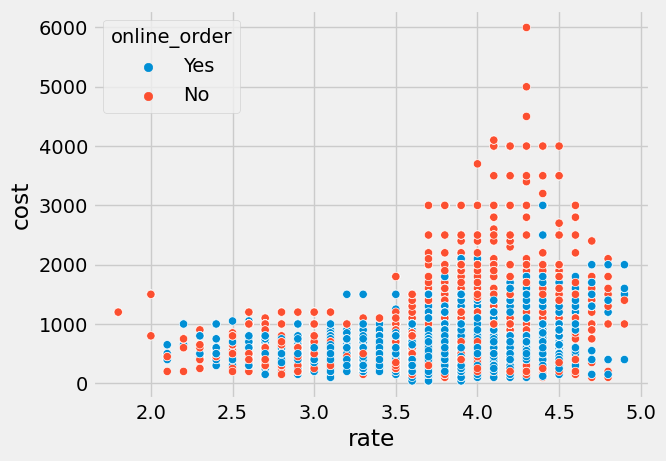

In [33]:
# Distribution of the cost vs ratings in parallel with online order
plt.figure()
sns.scatterplot(x='rate',y='cost',hue='online_order',data=df)
plt.show()

### Insights:
>**We can see that online orders are mostly in the cost of less than 2000 in the rates between 3.0 and 4.5**

In [49]:
df['cost'][df['cost'] > 1000].sort_values(ascending=False).head(15)

19139    6000.0
45618    6000.0
40266    5000.0
42141    4500.0
41591    4500.0
39416    4100.0
40262    4100.0
39125    4100.0
37715    4100.0
39356    4000.0
48217    4000.0
38705    4000.0
43298    4000.0
13071    4000.0
38709    4000.0
Name: cost, dtype: float64

**Count of Ratings as between "1 and 2","2 and 3","3 and 4" and "4 and 5"**

In [56]:
df['rate'].min()

1.8

In [57]:
df['rate'].max()

4.9

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,23248.0,3.905781,0.426153,1.8,3.8,4.0,4.2,4.9
votes,23248.0,605.461674,1113.706789,0.0,104.0,225.0,597.0,16832.0
cost,23248.0,753.500946,520.472169,40.0,400.0,600.0,1000.0,6000.0


In [67]:
r1 = ((df['rate']>=1) & (df['rate']<2)).sum()
r2 = ((df['rate']>=2) & (df['rate']<3)).sum()
r3 = ((df['rate']>=3) & (df['rate']<4)).sum()
r4 = (df['rate']>=4).sum()



print(r1)
print(r2)
print(r3)
print(r4)


5
1179
10153
11911


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

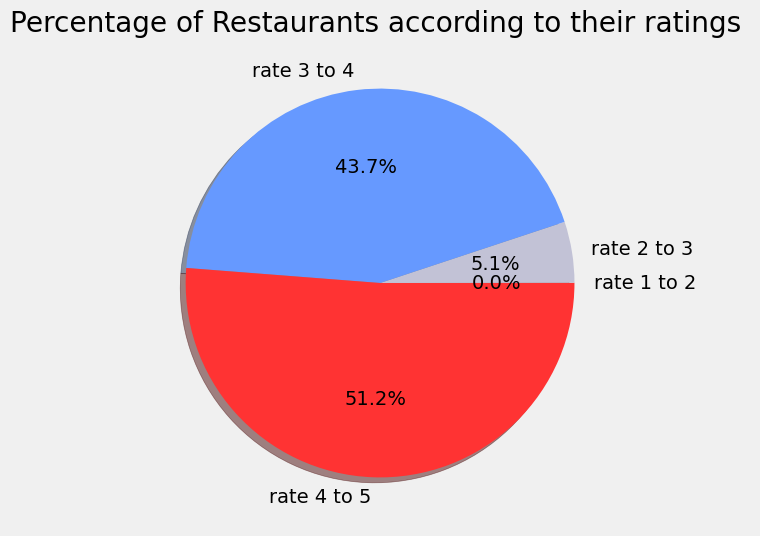

In [79]:
labels = 'rate 1 to 2', 'rate 2 to 3', 'rate 3 to 4', 'rate 4 to 5'
sizes = [r1, r2, r3, r4]
colors = ['#ff3333','#c2c2d6','#6699ff']

fig = plt.figure()
plt.pie(sizes,colors=colors, labels=labels, autopct='%1.1f%%',shadow=True)
plt.title("Percentage of Restaurants according to their ratings ")

fig.set_size_inches(6,6)
plt.show()

### Service Types

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

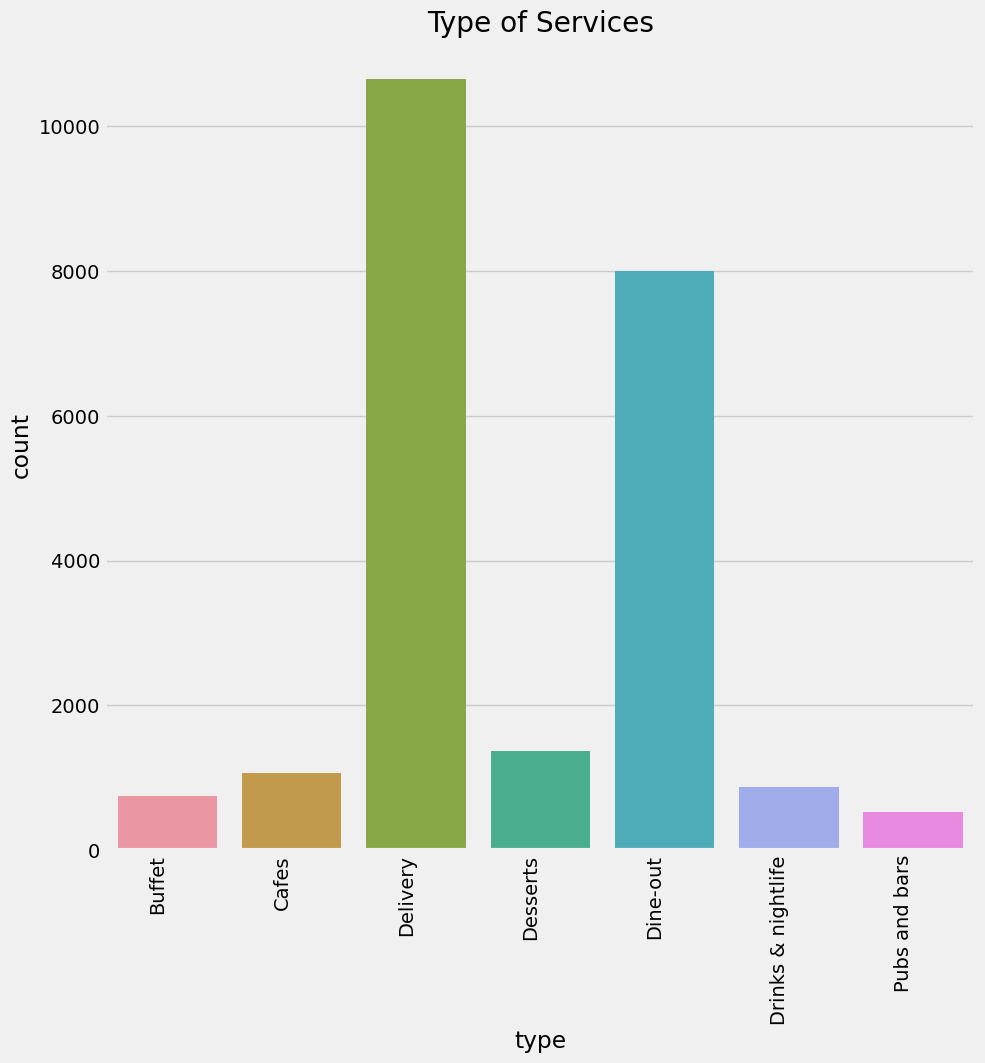

In [89]:
# Types of Services

fig = plt.figure()
sns.countplot(data=df, x = df['type'])

# Set the xticklabels to rotate 90 degrees and align to the right
plt.xticks(rotation=90, ha='right')

fig.set_size_inches(10,10)
plt.title('Type of Services')
plt.show()

Delivery              10657
Dine-out               8006
Desserts               1364
Cafes                  1066
Drinks & nightlife      879
Buffet                  753
Pubs and bars           523
Name: type, dtype: int64

### Insights:
>**The main services mostly are Delivery and Dine-out**

In [100]:
df['type'].value_counts()

10657

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

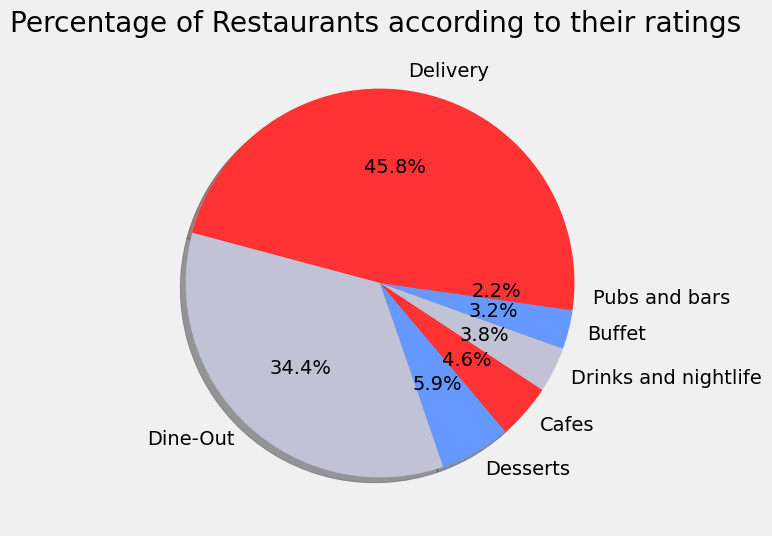

In [101]:
labels = 'Delivery', 'Dine-Out', 'Desserts', 'Cafes','Drinks and nightlife', 'Buffet','Pubs and bars'
sizes = []
for i in range(len(df['type'].value_counts())):
    sizes.append(df['type'].value_counts()[i])


fig = plt.figure()
plt.pie(sizes,colors=colors, labels=labels, autopct='%1.1f%%',shadow=True)
plt.title("Percentage of Restaurants according to their ratings ")

fig.set_size_inches(6,6)
plt.show()

## Distribution of Cost of Food for two People

In [102]:
from plotly.offline import iplot

In [106]:
trace0 = go.Box(y=df['cost'], name ='accepting online orders',
               marker = dict(
               color = 'rgb(113,10,100)'))
data= [trace0]
layout = go.Layout(title='Box plot of approximate cost', width=800,height=800,yaxis=dict(title='Price'))
fig=go.Figure(data=data, layout=layout)
py.iplot(fig)

#### Distributions of charges

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

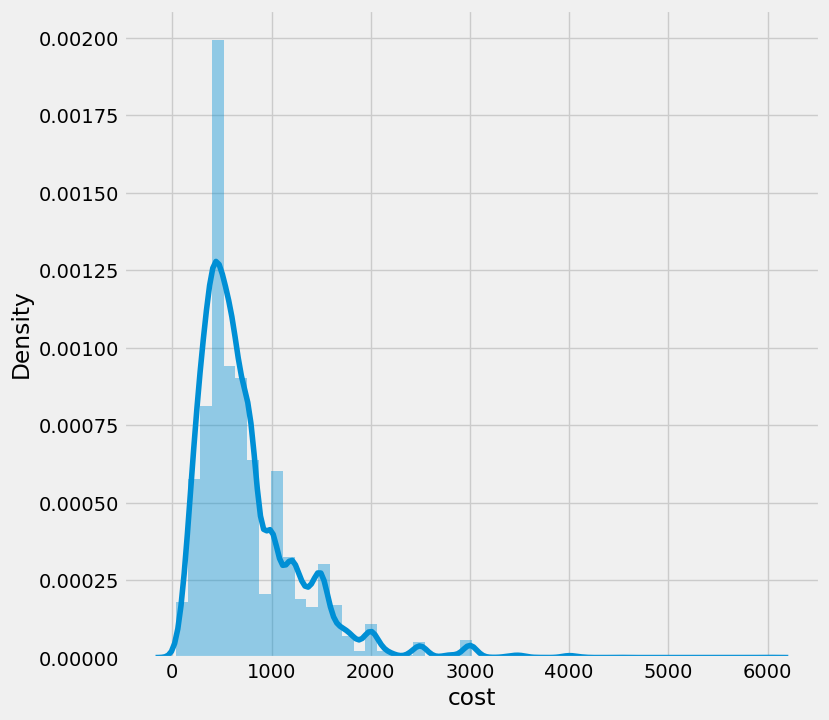

In [108]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

### Most Liked Dishes

In [124]:
# re=regular expression (use for splitting words)

import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)


In [125]:
df.index=range(df.shape[0])

In [126]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [127]:
print('Count of Most liked dishes in Bangalore')
fav_food = pd.Series(likes).value_counts()
fav_food.head(15)

Count of Most liked dishes in Bangalore


<IPython.core.display.Javascript object>

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
dtype: int64

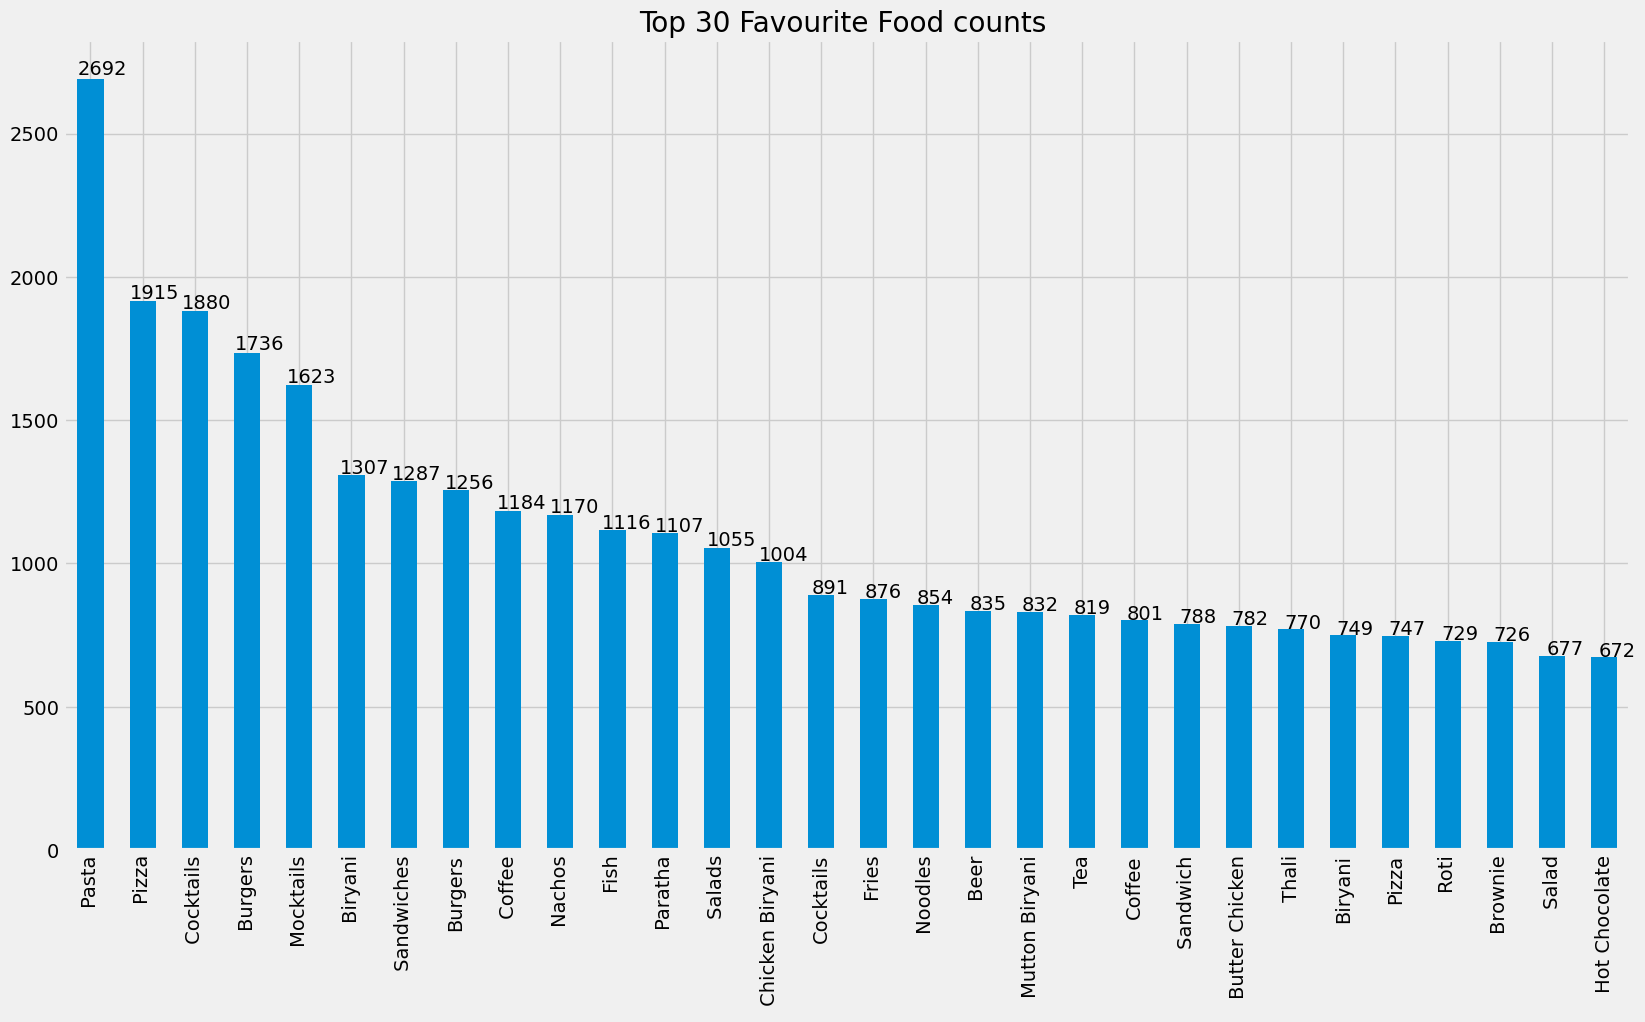

In [158]:
ax = fav_food.nlargest(n=30, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 30 Favourite Food counts ')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

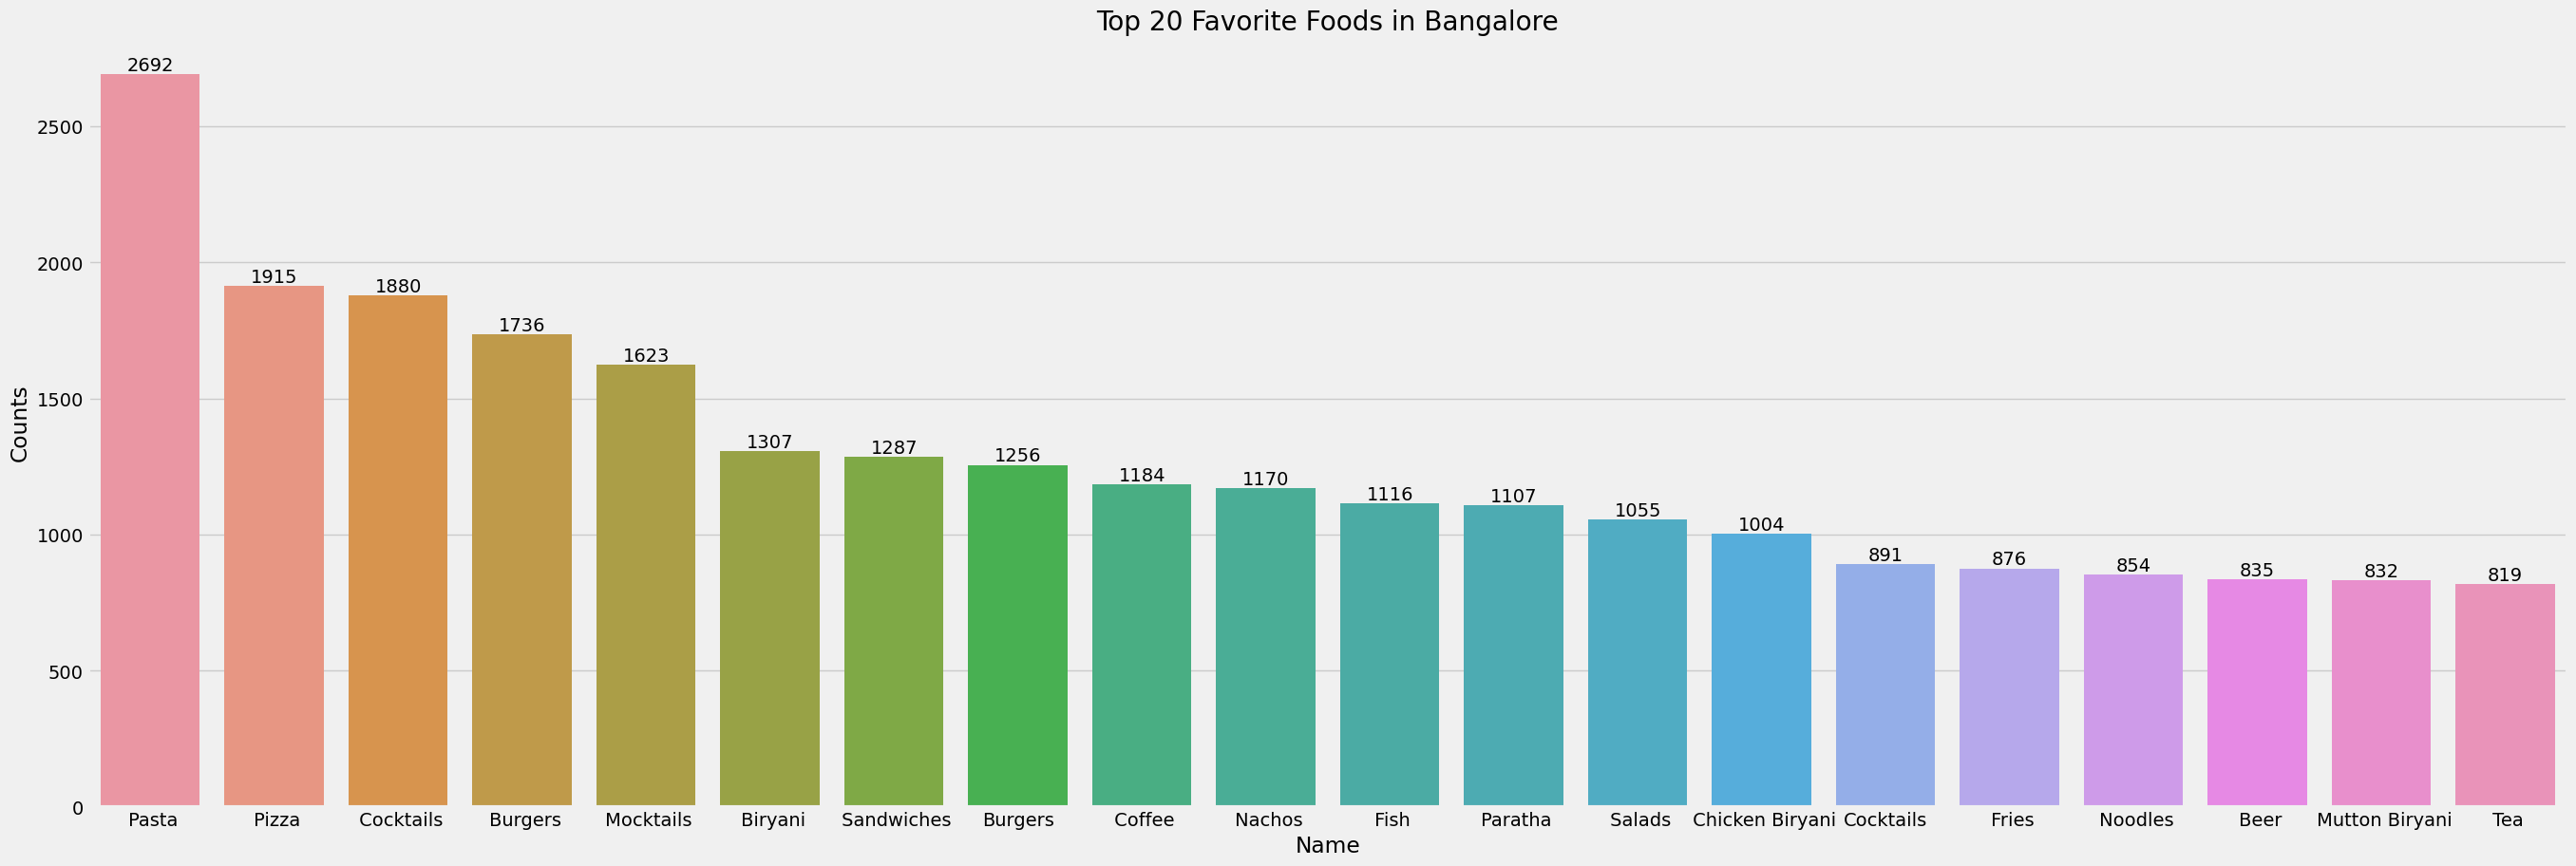

In [156]:
name = []
count = []
for i in range(20):
    name.append(fav_food.index[i])
    count.append(fav_food[i])

fig,ax = plt.subplots(figsize=(30,10))
sns.barplot(x=name, y=count,ax=ax)

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Counts')
plt.title('Top 20 Favorite Foods in Bangalore')

# Add annotations to the bars
for i, v in enumerate(count):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

### Insights:
>**The Top 5 dishes are 'Pasta' ,'Pizza' ,'Cocktails' ,'Burgers' and 'Mocktails'**

### Restaurant and their counts


In [166]:
df['rest_type'].value_counts().index

Index(['Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor',
       'Casual Dining, Bar', 'Delivery', 'Bar', 'Takeaway, Delivery',
       'Bar, Casual Dining', 'Pub', 'Fine Dining', 'Casual Dining, Cafe',
       'Lounge', 'Pub, Casual Dining', 'Food Court', 'Bakery',
       'Cafe, Casual Dining', 'Dessert Parlor, Cafe',
       'Beverage Shop, Quick Bites', 'Beverage Shop', 'Cafe, Bakery',
       'Casual Dining, Pub', 'Microbrewery, Casual Dining',
       'Cafe, Dessert Parlor', 'Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Pub, Microbrewery',
       'Dessert Parlor, Quick Bites', 'Bakery, Cafe', 'Bakery, Dessert Parlor',
       'Quick Bites, Dessert Parlor', 'Mess', 'Dessert Parlor, Beverage Shop',
       'Casual Dining, Microbrewery', 'Kiosk', 'Beverage Shop, Dessert Parlor',
       'Microbrewery, Pub', 'Quick Bites, Sweet Shop', 'Cafe, Quick Bites',
       'Fine Dining, Bar', 'Pub, Cafe', 'Lounge, Casual Dining', 'Club',
       'Lounge, Bar', 'Quick Bite

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

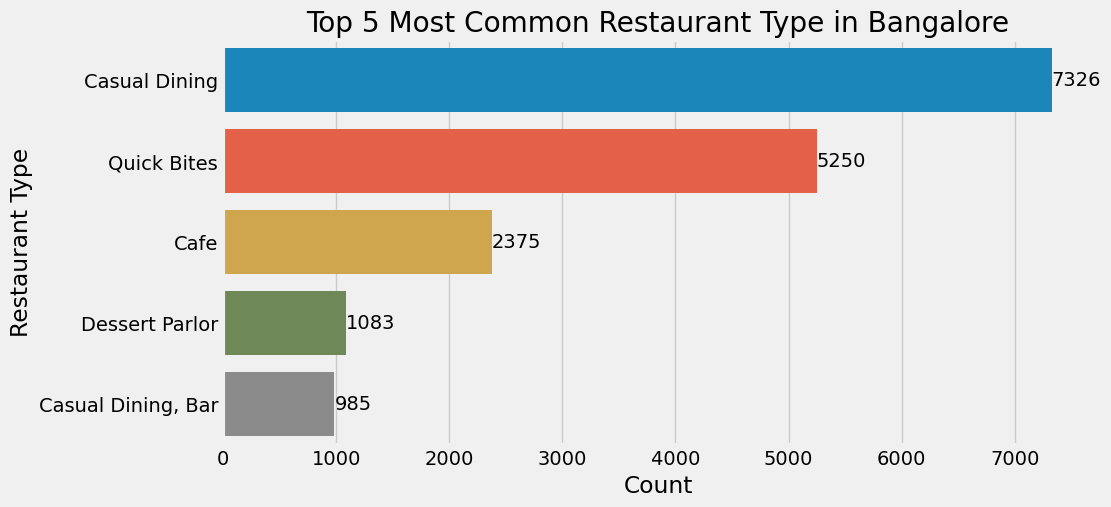

In [185]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create the bar plot
rest = df['rest_type'].value_counts().head(5)
sns.barplot(x=rest, y=rest.index, ax=ax)

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Restaurant Type')
ax.set_title('Top 5 Most Common Restaurant Type in Bangalore')

# Add annotations to the bars
for i, count in enumerate(rest):
    ax.text(count, i, str(count), ha='left', va='center')

# Show the plot
plt.show()

### Insights:
>**Top 3 most common types of Restaurants in Bangalore are 'Casual Dining' ,'Quick Bites' and 'Cafe'**

### Most Famous Restaurants

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

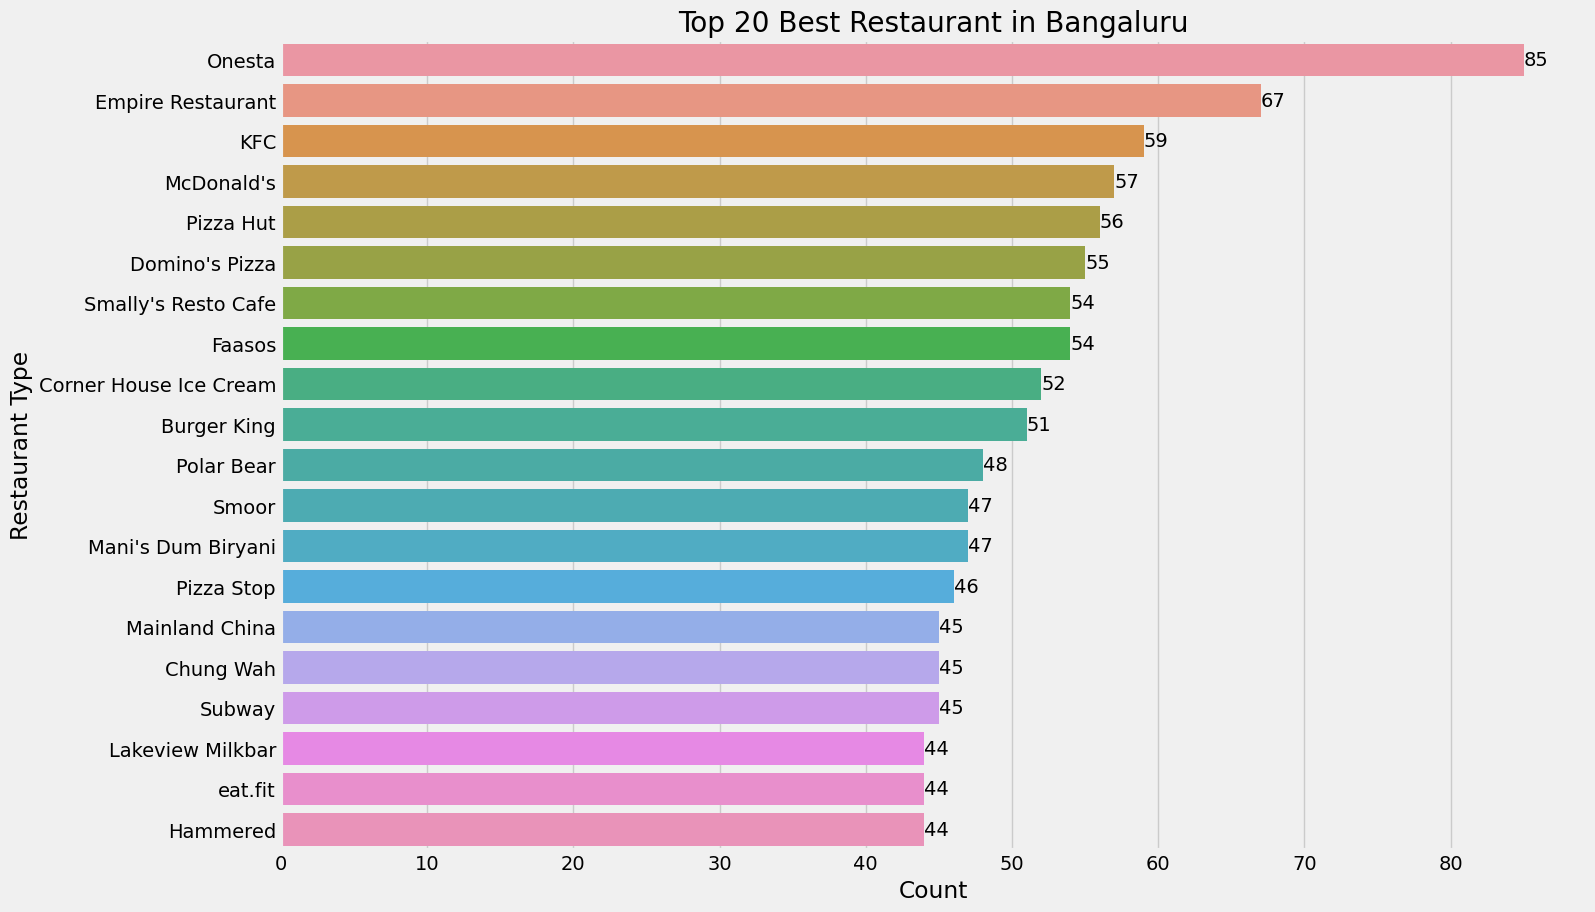

In [203]:
nm = df['name'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(15, 10))

# Create the bar plot
sns.barplot(x=nm, y=nm.index, ax=ax)

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Restaurant Type')
ax.set_title('Top 20 Best Restaurant in Bangaluru')

# Add annotations to the bars
for i, count in enumerate(nm):
    ax.text(count, i, str(count), ha='left', va='center')

# Show the plot
plt.show();


In [3]:
df = all()

<IPython.core.display.Javascript object>

# BUILDING THE MODEL

In [4]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Convert the online categorical variables into numeric format

#### Online_order

In [10]:
df['online_order'][df['online_order'] == 'Yes'] = 1
df['online_order'][df['online_order'] == 'No'] = 0

In [237]:
df['online_order'].value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [241]:
df['online_order'] = df['online_order'].astype(int)

In [242]:
df.dtypes

address          object
name             object
online_order      int32
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

#### Book Table

In [246]:
df['book_table'].value_counts()

No     17191
Yes     6057
Name: book_table, dtype: int64

In [11]:
df['book_table'][df['book_table']=='Yes'] = 1
df['book_table'][df['book_table']=='No'] = 0

In [250]:
df['book_table'] = df['book_table'].astype(int)

In [254]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Label encode the categorical variables to make it easier to build algorithm

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['location'] = le.fit_transform(df['location'])
df['rest_type'] = le.fit_transform(df['rest_type'])
df['cuisines'] = le.fit_transform(df['cuisines'])
df['menu_item'] = le.fit_transform(df['menu_item'])

In [257]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [14]:
df[df['rate'] >= 4.5 ].sort_values(by='rate',ascending=False)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
32110,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,1,1,4.9,2244,42,21,"Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...",134,1500.0,"[('Rated 3.0', 'RATED\n Hmm not great not bad...",5047,Buffet,Koramangala 6th Block
46960,"26/1, Dr Rajkumar Road, Brigade Gateway Campus...",Punjab Grill,1,1,4.9,1985,52,20,"Chicken Malai Tikka, Jalebi Rabri, Lunch Buffe...",1375,2000.0,"[('Rated 5.0', 'RATED\n Good food, great serv...",5047,Dine-out,Rajajinagar
7118,"Ground Floor, Forum Shantiniketan, Whitefield ...",Punjab Grill,1,0,4.9,518,84,20,"Kadai Paneer, Kulfi, Kadhai Paneer, Dahi Kebab...",1156,2000.0,"[('Rated 5.0', 'RATED\n The food is great...t...",3291,Delivery,Brookefield
32436,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,1,1,4.9,2244,42,21,"Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...",134,1500.0,"[('Rated 3.0', 'RATED\n Hmm not great not bad...",4955,Delivery,Koramangala 6th Block
6746,"120 A3, 2nd Floor, Santosh Tower, EPIP Industr...",Flechazo,0,1,4.9,2745,84,20,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...",153,1400.0,"[('Rated 5.0', 'RATED\n Food quality is amazi...",5047,Buffet,Brookefield
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16770,"1502, Ground Floor, Sector 1, HSR Layout, HSR,...",Bonum cibum,1,0,4.5,196,22,20,"Shawarma, Pasta, Falafel, Mocktails, Babaganus...",1076,1200.0,"[('Rated 1.0', 'RATED\n This is a restaurant ...",5047,Delivery,HSR
33942,"413, 100 Feet Road, Next E-Zone, Koramangala 4...",The Terrace at Gilly's Redefined,0,1,4.5,905,41,54,"Cocktails, Mocktails, Beer, Biryani, Long Isla...",687,1400.0,"[('Rated 1.0', ""RATED\n Ambience was good.\nV...",5047,Dine-out,Koramangala 6th Block
16421,"36, 1st Floor, 14th Main Road, 7th Sector, 80 ...",Once Upon A Flame,1,0,4.5,2068,22,20,"Burgers, Pasta, Mocktails, Mashed Potato, Sala...",1626,1200.0,"[('Rated 4.0', 'RATED\n A very decent place s...",5047,Delivery,HSR
16259,"1001, 9th Main, Sector 7, HSR Layout, Bangalor...",Corner House Ice Cream,1,0,4.5,206,22,30,"Hot Chocolate Fudge, Brownie Fudge, Thick Shak...",956,400.0,"[('Rated 4.0', 'RATED\n It was wonderful expe...",5047,Delivery,HSR


### Saving to csv

In [276]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df1.csv')

# BUILDING THE MODEL

In [318]:
from sklearn.metrics import accuracy_score

def r2_eval(pred):
    print(f"The r2_score: {round(r2_score(y_test,pred)*100,2)}%")
  

### Creating the x and y

In [277]:
x = df.iloc[:,[2,3,4,5,6,7,9,10,12]]
y = df['rate']

### Create the train and test set

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

## Model 1: Linear Regression

In [285]:
from sklearn.metrics import r2_score

# Create the model
model_lr = LinearRegression()

# Fit the model
model_lr.fit(x_train,y_train)

# Predict the model
lr_pred = model_lr.predict(x_test)

# For regression dataset use r2_score
print(f'The r2_score: {round(r2_score(y_test,lr_pred)*100,2)}%')

The r2_score: 100.0%


## Model 2: Decision Tree

In [309]:
# import the libraries needed
from sklearn.tree import DecisionTreeRegressor

# Create the model
model_dtr = DecisionTreeRegressor()

# Fit the model
model_dtr.fit(x_train,y_train)

# Predict the model
dtr_pred = model_dtr.predict(x_test)

# evaluate the model
print(f'The r2_score: {round(r2_score(y_test,dtr_pred)*100,2)}')

The r2_score: 100.0


## Model 3: Random Forest Regressor


In [316]:
# import the needed libraries
from sklearn.ensemble import RandomForestRegressor

# Create the model
model_rfr = RandomForestRegressor(n_estimators = 650, random_state=245,min_samples_leaf=.0001)

# fit the model
model_rfr.fit(x_train,y_train)

# predict the model
rfr_pred = model_rfr.predict(x_test)

# evalute the model
print(f"The r2_score: {round(r2_score(y_test,rfr_pred)*100,2)}%")

The r2_score: 100.0%


## Model 4: Extra Trees Regressor

In [319]:
# import the libraries needed
from sklearn.ensemble import ExtraTreesRegressor

# Create the model
model_etr = ExtraTreesRegressor()

# Fit the model
model_etr.fit(x_train,y_train)

# Predict the model
etr_pred = model_etr.predict(x_test)

# evaluate the model
r2_eval(etr_pred)

The r2_score: 100.0%


### ALL THE MODELS ARE GOOD

**Use pickle to save our model so that we can use it**



In [323]:
import pickle
# Saving the model to disk
pickle.dump(model_etr, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))